# Consumer Sentiment Insights Using NLP on Twitter Data

### Business Overview

#### Introduction

In today’s fast-paced digital landscape, social media platforms like Twitter offer companies invaluable real-time feedback from their customers. Understanding the sentiment behind these conversations allows companies to make informed decisions, enhance customer satisfaction, and protect their reputation. Sentiment analysis, particularly on platforms like Twitter, provides a strategic advantage by uncovering public opinion on specific brands and products.

This project seeks to address a key challenge: **how can companies use Twitter data to gauge public sentiment about their products, and how can this sentiment inform business decisions?**

**The primary goal of this project is to develop a sentiment analysis model tailored to analyze Twitter data related to Google, Apple, and other products.** This model will help companies monitor and understand consumer sentiment, enabling them to refine their strategies and improve overall customer engagement.

#### Stakeholders

Key stakeholders who would benefit from this project include:

**1. Product Managers** at Apple and Google, who can use the insights to tweak product features based on consumer sentiment.

**2. Marketing Teams** looking to assess the effectiveness of campaigns or brand perception.

**3. Customer Support Teams**, who can use the analysis to proactively address negative sentiment or capitalize on positive feedback.

**4. Consultants and market analysts** seeking to provide data-driven advice to tech companies on consumer perceptions.

#### Business Problem Statement

This consulting project aims to deliver a model capable of analyzing the sentiment expressed in tweets. Specifically, it will assess whether tweets about Apple and Google products convey a **positive, negative, or neutral sentiment.** These insights will inform strategic decisions, help maintain brand reputation, and guide efforts to enhance customer satisfaction.

#### Data Understanding

We are using a dataset sourced from **CrowdFlower via Data.world,** containing approximately 9,000 tweets expressing sentiments about Apple and Google products. This dataset includes columns such as `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`. The main objective is to accurately classify each tweet into one of three sentiment categories: positive, negative, or neutral.

#### Project Objectives

1.**Binary Classification Model:** The first objective is to develop a binary classification model to classify tweets as either positive or negative. Using Logistic Regression, this model aims to achieve a benchmark accuracy of 85%, serving as a proof of concept.

2.**Multiclass Classification Expansion:** After establishing a successful binary classification, we will develop a multiclass classifier to include neutral sentiments. This will provide a more comprehensive understanding of consumer sentiment and will be built using models like XGBoost and Multinomial Naive Bayes, with a target accuracy of 70%.

3.**Sentiment Comparison Between Apple and Google Products:** A final objective is to compare sentiment across the brands by analyzing the distribution of sentiments in tweets mentioning Apple, Google, and other products. This comparison will provide valuable insights for stakeholders to refine their strategies.



##### Methodology Overview


1.**Data Understanding**
   - Familiarizing with the structure of the dataset (e.g., columns like `tweet_text`, `emotion_in_tweet_is_directed_at`, and `is_there_an_emotion_directed_at_a_brand_or_product`).
   - Identifying any initial anomalies (e.g., missing values, duplicates) that need cleaning.

2.**Data Preparation**
- Preprocessing steps:

    - Removed duplicate entries.
    - Addressed missing values by populating the emotion_in_tweet_is_directed_at column with "none" and removed entries     lacking tweet_text.
    - Applied text preprocessing techniques: tokenization, lowercasing, stopword removal, and lemmatization.

3.**Modeling**
    - Utilized key libraries: NLTK (for tokenization, stopword removal, lemmatization), sklearn's CountVectorizer (for vectorization), and pandas (for data handling).
    - Developed a logistic regression model for binary classification (positive/negative sentiment), aiming for 70% accuracy.
    - Expanded to a multiclass classifier to include neutral sentiments.

4.**Evaluation**
    - Accuracy was used as the main evaluation metric, measuring the model's overall ability to classify sentiments correctly.
    - While the model performed satisfactorily, missing values and data quality issues are potential limitations.

## 1. Data understanding

#### 1.1 Load Libraries
We will start by importing all libraries used throughout the notebook.

In [1]:
# Loading necessary libraries
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import warnings

# Ignore warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Importing NLTK and setting up the data path
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import FreqDist
from nltk import pos_tag, word_tokenize
from nltk.corpus import wordnet

# Modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb

# Imbalance handling libraries
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Additional metrics for evaluation
from sklearn.metrics import accuracy_score

# Additional libraries for text preprocessing
from bs4 import BeautifulSoup
import contractions

# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package punkt to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### 1.2 Loading the data 


In [2]:
# loading and previewing data
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


#### 1.3  Statistic Describing the dataset

In [3]:
# lets view the shape of the data
data.shape


(9093, 3)

The DataFrame has:
	* 9093 rows
	* 3 columns 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


Summary of Data Understanding

- The dataset has 3 columns namely:tweet_text, emotion_in_tweet_is_directed_at ,is_there_an_emotion_directed_at_a_brand_or_product
- The dataset has 9093 rows
- All the dataset's columns datatypes are objects

## 2. Data Preparation 
#### Introduction

We will be preparing our data for analysis by checking for attributes such as; 

> Missing values 

> Duplicates 

> Other inconsistencies as computed below

##### 2.1  Missing values

In [5]:
# Function to identify missing values
def identify_missing_values(data):
    """Identify if the data has missing values"""
    if data.isnull().any().any():
        print("The Data has missing values.")
    else:
        print("The Data has no missing values.")

identify_missing_values(data)


The Data has missing values.


In [6]:
# Function to display missing values
def missing_values(data):
    """Identify and display columns with missing values and their percentages."""
    missing = data.isnull().mean().sort_values(ascending=False) * 100
    missing = missing[missing > 0]
    return pd.DataFrame({"Missing Values": data.isnull().sum(), "Percentage(%)": missing})

missing_values(data)


,Missing Values,Percentage(%)
emotion_in_tweet_is_directed_at,5802,63.807324
is_there_an_emotion_directed_at_a_brand_or_product,0,NaN
tweet_text,1,0.010997


In [7]:
# dropping missing row in tweet_text

data.dropna(axis=0,subset=['tweet_text'],inplace=True)

In [8]:
data.shape

(9092, 3)

In [9]:
# confirmation
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                        True
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

In [10]:
# Replacing null values in 'emotion_in_tweet_is_directed_at' with 'none'

data['emotion_in_tweet_is_directed_at'].fillna('none', inplace =True)
print("Missing values in 'emotion_in_tweet_is_directed_at' have been successfully replaced with 'none'.")

Missing values in 'emotion_in_tweet_is_directed_at' have been successfully replaced with 'none'.


In [11]:
#confirming we replaced the 'nan' with 'none'
data['emotion_in_tweet_is_directed_at'].value_counts()

emotion_in_tweet_is_directed_at
none                               5801
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: count, dtype: int64

In [12]:
data.isna().any()

tweet_text                                            False
emotion_in_tweet_is_directed_at                       False
is_there_an_emotion_directed_at_a_brand_or_product    False
dtype: bool

##### Summary - Missing Values Analysis

- tweet_text had 0.01% missing values, and emotion_in_tweet_is_directed_at had 63.81% missing values.
- Missing values in emotion_in_tweet_is_directed_at were replaced with "none", and rows with missing tweet_text were dropped.

##### 2.2 Duplicates

In [13]:
# Function to identify duplicates
def identify_duplicates(data):
    """Identify and report duplicate rows in the dataset."""
    duplicate_count = data.duplicated().sum()
    if duplicate_count == 0:
        print("The Data has no duplicates.")
    else:
        duplicates_percentage = np.round((duplicate_count / len(data)) * 100, 3)
        print(f"The Data has {duplicate_count} duplicated rows, constituting {duplicates_percentage}% of the dataset.")

identify_duplicates(data)


The Data has 22 duplicated rows, constituting 0.242% of the dataset.


In [14]:


# Identify duplicates
duplicates = data[data.duplicated()]
# Display the 22 duplicates, if available
duplicates.head(22)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,none,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,none,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,none,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",none,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,none,No emotion toward brand or product


In [15]:
data.duplicated().sum()

np.int64(22)

We  will remove duplicates since duplicates in NLP should be removed to avoid biased model performance, overfitting, and skewed sentiment distributions, which can lead to inaccurate and unreliable sentiment analysis results. Removing them ensures a more diverse and representative dataset, improving model generalization.

In [16]:
# handling the duplicates 
def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = identify_duplicates(data)

    return confirm 

remove_duplicated_rows(data)

The Data has no duplicates.


In [17]:
data.shape

(9070, 3)

##### Summary - Duplicate Values Analysis
> We found out that the **tweet text** column had 22 duplicates ```( 0.242% )``` and went ahead and  dropped  them.

In [18]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


This ensures the dataset contains only the three sentiment categories: Positive (2,970 entries), Negative (569 entries), and Neutral (5,531 entries).

##### 2.3 Handling long column names(Renaming long column names)

In [19]:
print(data.columns)


Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')


In [20]:
# Renaming the columns
data_renamed = data.rename(columns={
    'emotion_in_tweet_is_directed_at':'product_brand',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

# Display the updated columns
print(data_renamed.columns)


Index(['tweet_text', 'product_brand', 'sentiment'], dtype='object')


In [21]:
# Displaying the first few rows of the DataFrame
print(data_renamed.head())


                                          tweet_text       product_brand  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion  


##### Summary - Renaming long column names

We renamed  the column ```emotion_in_tweet_is_directed_at``` to ```product_brand``` and the column ```is_there_an_emotion_directed_at_a_brand_or_product``` to ```sentiment``` to enhance clarity and facilitate their usage in our subsequent computation

In [22]:
data_renamed.shape

(9070, 3)

In [23]:
data_renamed.tail()

,tweet_text,product_brand,sentiment
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",none,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",none,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,none,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...,none,No emotion toward brand or product


##### 2.4 Classifying Sentiments into Positive, Negative, and Neutral Categories

The main project objective is to accurately classify each tweet into one of three sentiment categories: Positive, Negative, or Neutral.

In this step, we classified the sentiments based on the original labels in the dataset:

Positive emotion is classified as Positive.
Negative emotion is classified as Negative.
Both "I can't tell" and No emotion toward brand or product are classified as Neutral.

In [24]:
# Define a function to classify the sentiments
def classify_sentiment(sentiment):
    if sentiment == 'Positive emotion':
        return 'Positive'
    elif sentiment == 'Negative emotion':
        return 'Negative'
    else:
        return 'Neutral'

# Copy the data from 'data_renamed' to 'data_classified'
data_classified = data_renamed.copy()

# Apply the classification to 'data_classified'
data_classified['sentiment'] = data_classified['sentiment'].apply(classify_sentiment)

# Check the distribution of the classified sentiments
classified_sentiment_counts = data_classified['sentiment'].value_counts()
print(classified_sentiment_counts)


sentiment
Neutral     5531
Positive    2970
Negative     569
Name: count, dtype: int64


In [25]:
data_classified.head()

,tweet_text,product_brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


 ##### 2.5 Mapping Product Brands to Parent Companies

 Mapping product brands to parent companies simplifies analysis by aggregating related products under one entity, making it easier to compare trends and insights at the company level. This approach provides a clearer, high-level view of performance or sentiment across major brands.

In [26]:
# Overall parent company distribution
# Feature engineering to create a new 'parent_company' column
data_classified['parent_company'] = data_classified['product_brand'].map({
    'Other Apple product or service': 'Apple', 
    'Android': 'Google',
    'Android App': 'Google',
    'Other Google product or service ': 'Google',
    'iPhone': 'Apple', 
    'Google': 'Google',
    'iPad or iPhone App': 'Apple',
    'Apple': 'Apple',
    'iPad': 'Apple',
    'none': 'none'
})

# Display the value counts of the new 'parent_company' column
print(data_classified['parent_company'].value_counts())


parent_company
none      5788
Apple     2404
Google     585
Name: count, dtype: int64


In [27]:
data_classified.head()

,tweet_text,product_brand,sentiment,parent_company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google



## 3. Exploratory Data Analysis (EDA)

#### Introduction

We  will conduct Univariate and Bivariate analysis of the sentiments and create visualizations to see how they relate with each other and individually.

### 3.1 Univariate analysis

We will plot a count plot to show the distribution of the column 'sentiment'Visualizing Parent Company and Sentiment Distribution

Parent Company Distribution (Percentage):
 parent_company
none      65.945084
Apple     27.389769
Google     6.665148
Name: proportion, dtype: float64
Sentiment Distribution (Percentage):
 sentiment
Neutral     60.981257
Positive    32.745314
Negative     6.273429
Name: proportion, dtype: float64


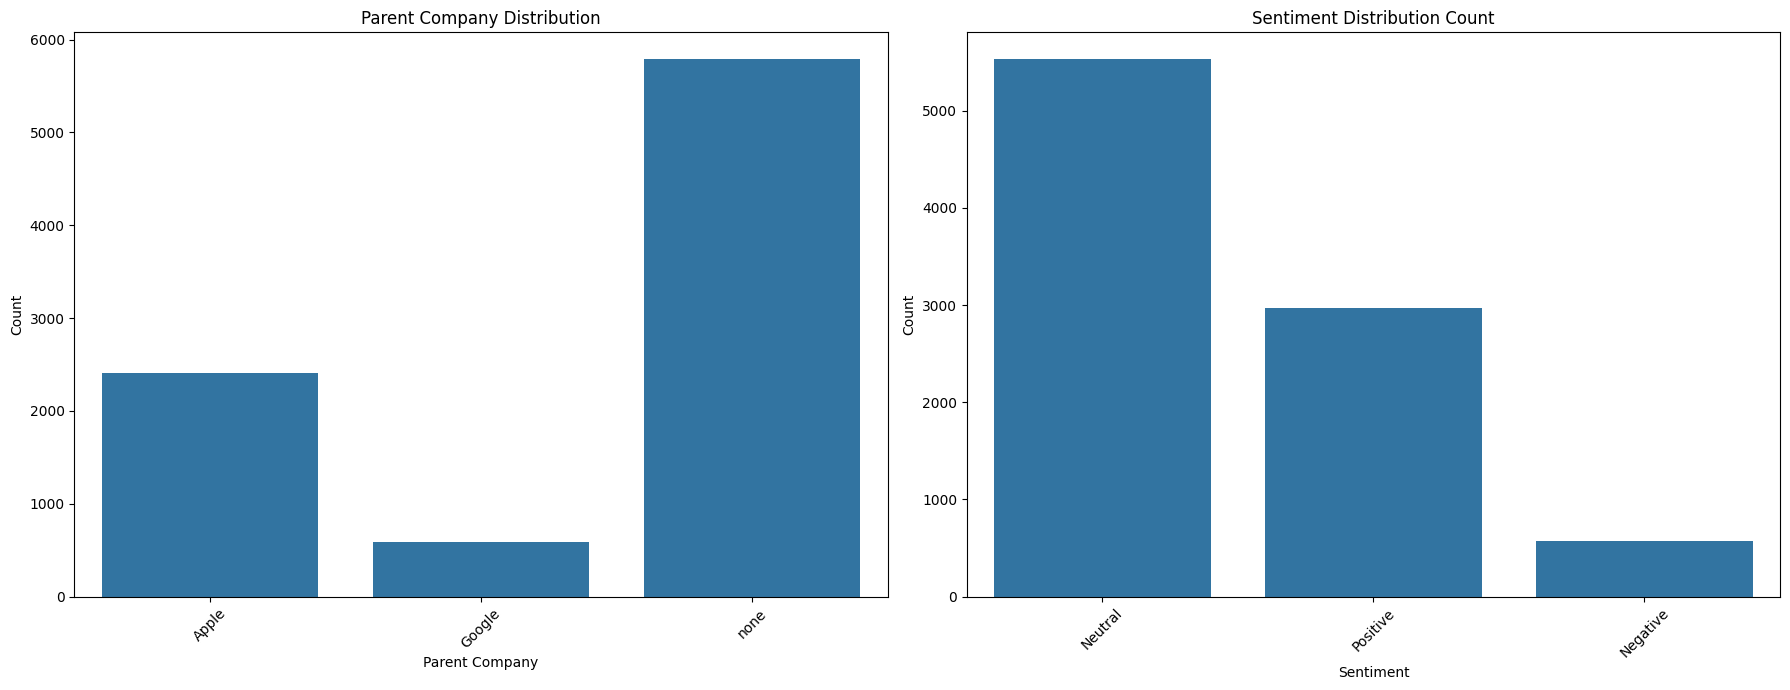

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot canvas for two side-by-side visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Parent Company Distribution Count
sns.countplot(x='parent_company', data=data_classified, ax=axes[0])
axes[0].set(title='Parent Company Distribution', xlabel='Parent Company', ylabel='Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Sentiment Distribution Count
sns.countplot(x='sentiment', data=data_classified, order=data_classified['sentiment'].value_counts().index, ax=axes[1])
axes[1].set(title='Sentiment Distribution Count', xlabel='Sentiment', ylabel='Count')
axes[1].tick_params(axis='x', rotation=45)

# Print the percentage distribution
print("Parent Company Distribution (Percentage):\n", data_classified['parent_company'].value_counts(normalize=True) * 100)
print("Sentiment Distribution (Percentage):\n", data_classified['sentiment'].value_counts(normalize=True) * 100)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Summary:

The majority of the dataset is associated with "None" (over 5,500 mentions), meaning most entries are not linked to Apple or Google. Apple has about 2,200 mentions, while Google has significantly fewer. In terms of sentiment, Neutral dominates with around 5,500 mentions, followed by Positive sentiment (~3,000), and very few Negative mentions (under 600). This suggests that most comments are neutral or positive, with minimal negative feedback.

Key Insights:
- Neutral sentiment dominates the dataset, which may indicate that most mentions are objective or lack strong emotional content.
- Apple is the most frequently mentioned brand after "none," while Google has relatively fewer mentions.
- The overall positive sentiment outweighs the negative, which suggests general satisfaction or favorable perception among those who express sentiment.

### 3.2 Bivariate analysis

Comparative Analysis of Sentiment Distribution Across Product Brands and Parent Companies

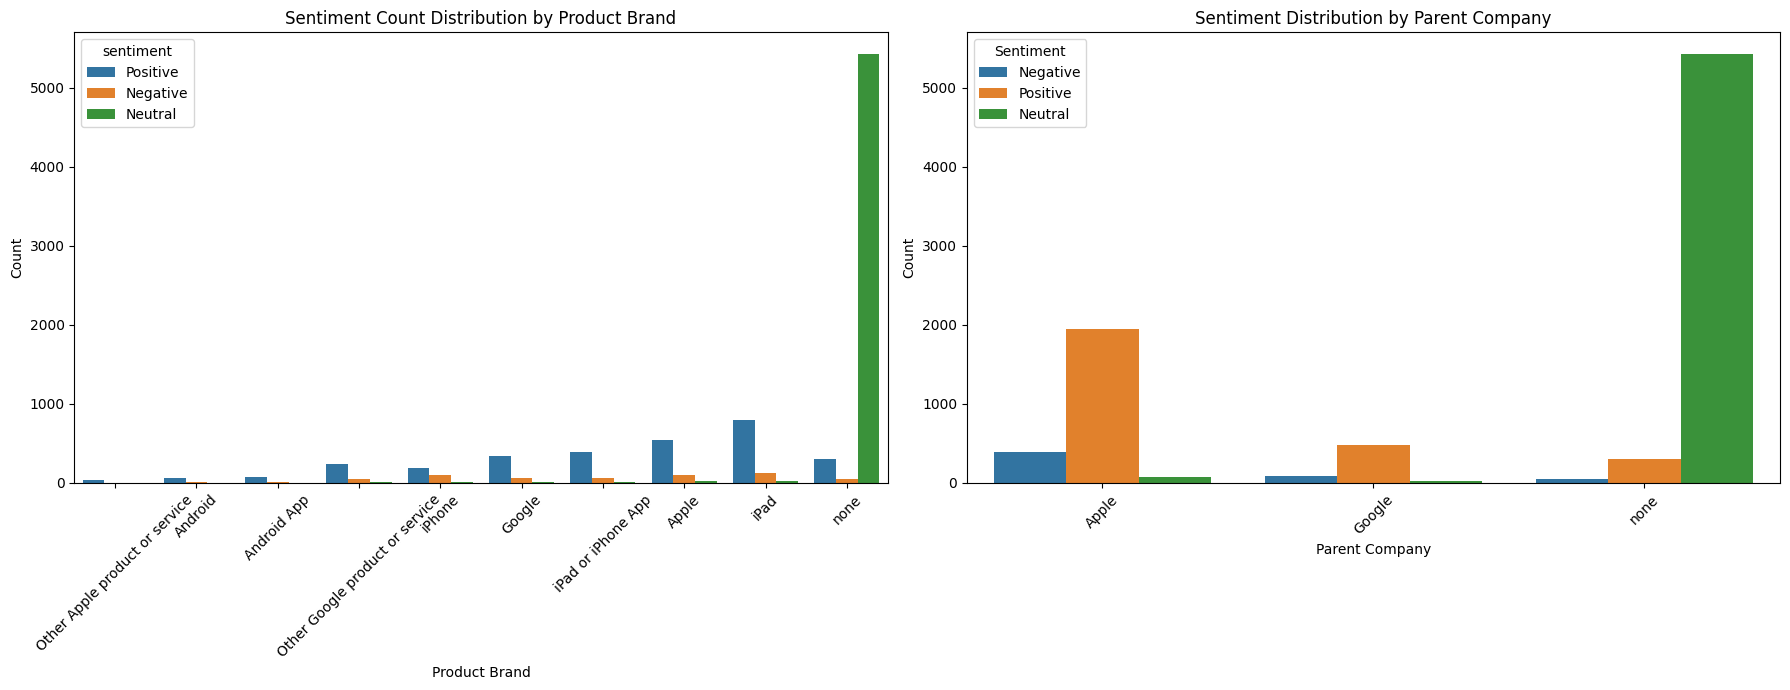

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot canvas for two side-by-side visualizations
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Sentiment Count Distribution by Product Brand
product_group = data_classified.groupby('product_brand')['sentiment'].value_counts().reset_index(name='count')
sns.barplot(x='product_brand', y='count', hue='sentiment', data=product_group, 
            order=product_group.groupby('product_brand')['count'].sum().sort_values().index, ax=axes[0])
axes[0].set(title='Sentiment Count Distribution by Product Brand', xlabel='Product Brand', ylabel='Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Sentiment Distribution by Parent Company
sns.countplot(x='parent_company', hue='sentiment', data=data_classified, ax=axes[1])
axes[1].set(title='Sentiment Distribution by Parent Company', xlabel='Parent Company', ylabel='Count')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Sentiment')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Sentiment Count Distribution by Product Brand (Left Plot):

The product brand labeled as "none" dominates with over 5,000 neutral mentions, indicating a significant portion of the data does not pertain to specific products.
Among named brands, **Apple** and **iPad are the most mentioned**, with a mix of neutral, positive, and minimal negative sentiments.
Other brands like **Google, iPhone, and Android App have comparatively fewer mentions**, with positive sentiment being more prevalent than negative.

Sentiment Distribution by Parent Company (Right Plot):

Apple has a substantial number of positive mentions, while Google shows fewer mentions overall.
The "none" category again dominates with a large number of neutral mentions, indicating a significant portion of the data is not linked to any parent company.

Summary:

Most of the data is associated with neutral sentiment, particularly for the "none" category, which likely represents items not linked to specific brands or companies. Apple stands out with the most positive sentiment, followed by a small share of negative sentiment. Google has fewer mentions overall but still leans toward positive sentiment.

In [30]:
data_classified.head()# confirming columns before preprocessing 

,tweet_text,product_brand,sentiment,parent_company
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google


In [31]:
data_classified.shape

(9070, 4)

In [32]:
# Save the cleaned data before preprocessing  to your local system
data_classified.to_csv(r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_classified.csv', index=False)

## 4. Preprocessing

###  **Introduction**

In this section we will; 

* Convert the tweet text to lower case
* Remove html tags 
* Remove the Url 
* Expand the contractions 
* Remove the punctuations
* Tokenize
* Remove stopwords 
* Lemmatize the tweet

So as to prepare the data for modeling.

**4.1 Text Preprocessing Pipeline: Cleaning and Tokenization of Tweets**

In [33]:

# Define stopwords
stop_words = set(stopwords.words('english'))

# Function to check if the string is more like a file path
def resembles_path(text):
    return bool(re.search(r"\\|\/|\w:\w|\.html|\.htm", text))

# Function to clean the text
def clean_tweet(tweet):
    # Ensure the tweet is a string
    if isinstance(tweet, str):
        # 1. Convert text to lowercase
        tweet = tweet.lower()

        # 2. Remove URLs
        tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
        
        # 3. Remove HTML tags (only if the text doesn't resemble a file path or URL)
        if not resembles_path(tweet):
            tweet = BeautifulSoup(tweet, "html.parser").get_text()
        
        # 4. Expand contractions
        tweet = contractions.fix(tweet)
        
        # 5. Remove punctuation
        tweet = re.sub(r'[^\w\s]', '', tweet)
        
        # 6. Tokenize the tweet
        tokens = word_tokenize(tweet)
        
        # 7. Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
        
        # 8. Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
        
        # Join tokens back into a single string
        return ' '.join(lemmatized_tokens)
    
    # Return the tweet as is if it’s not a string (e.g., missing value)
    return tweet

# Apply the cleaning function to the tweet text
data_1 = data_classified .copy()  # Copy to a new DataFrame named 'data_processed'
data_1['cleaned_tweet_text'] = data_1['tweet_text'].apply(clean_tweet)

# Save the cleaned data to your local system
data_1.to_csv(r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_1.csv', index=False)

# View the first few rows of cleaned data
data_1.head()



,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,wesley83 3g iphone 3 hr tweeting rise_austin d...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,jessedee know fludapp awesome ipadiphone app l...
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,swonderlin wait ipad 2 also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,sxsw hope year festival crashy year iphone app...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,sxtxstate great stuff fri sxsw marissa mayer g...


**4.2 Contraction and Lemmatization Check**

In [34]:
import re

# List of common contractions to check for missed ones
contractions_list = ["'ve", "n't", "'ll", "'re", "'m", "'d", "'s"]

# Function to check for contractions in cleaned data
def check_contractions(text):
    return any(re.search(contraction, text) for contraction in contractions_list)

# Check for missed contractions
data_1['missed_contractions'] = data_1['cleaned_tweet_text'].apply(check_contractions)

# Display rows where contractions might still exist
missed_contractions = data_1[data_1['missed_contractions'] == True]
print("Rows with possible missed contractions:")
print(missed_contractions[['tweet_text', 'cleaned_tweet_text']])

# Check if 'is' was lemmatized to 'be' or other lemmatized forms
lemmatization_checks = ['is', 'are', 'was', 'were', 'has', 'have', 'does', 'did']

# Function to check if certain words were lemmatized
def check_lemmatization(text):
    return any(word in text.split() for word in lemmatization_checks)

# Check for lemmatization on verbs
data_1['lemmatization_check'] = data_1['cleaned_tweet_text'].apply(check_lemmatization)

data_2=data_1.copy()

# Save the cleaned data to your local system
data_2.to_csv(r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_2.csv', index=False)


# Display rows where the original text had verbs that should have been lemmatized
missed_lemmatization = data_2[data_2['lemmatization_check'] == True]
print("Rows with possible missed lemmatization:")
print(missed_lemmatization[['tweet_text', 'cleaned_tweet_text']])


Rows with possible missed contractions:
Empty DataFrame
Columns: [tweet_text, cleaned_tweet_text]
Index: []
Rows with possible missed lemmatization:
                                             tweet_text  \
1814  Building a custom Android home screen for #sxs...   
5585  RT @mention Building a custom Android home scr...   

                                     cleaned_tweet_text  
1814  building custom android home screen sxsw sxswi...  
5585  rt mention building custom android home screen...  


In [35]:
data_2.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,wesley83 3g iphone 3 hr tweeting rise_austin d...,False,False
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,jessedee know fludapp awesome ipadiphone app l...,False,False
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,swonderlin wait ipad 2 also sale sxsw,False,False
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,sxsw hope year festival crashy year iphone app...,False,False
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,sxtxstate great stuff fri sxsw marissa mayer g...,False,False


In [36]:
data_2.shape

(9070, 7)

  **4.3 Enhanced Lemmatization Using SpaCy**

In [267]:

import spacy
import re

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Enhanced lemmatization function using SpaCy
def clean_tweet_with_pos(tweet):
    # Ensure tweet is a string
    if isinstance(tweet, str):
        tweet = tweet.lower()
        # Remove URLs
        tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
        # Remove punctuation
        tweet = re.sub(r'[^\w\s]', '', tweet)
        
        # Process the tweet with SpaCy to get tokens and POS tags
        doc = nlp(tweet)
        
        # Lemmatize based on POS tags
        lemmatized_tokens = [token.lemma_ for token in doc]
        
        return ' '.join(lemmatized_tokens)
    
    return tweet

# Assuming your dataframe is named 'data_processed' and has a column 'tweet_text'
data_3 = data_2.copy()  # Copy the original dataset to a new one
data_3['cleaned_tweet_text'] = data_3['tweet_text'].apply(clean_tweet_with_pos)

# Save the newly processed data
data_3.to_csv(r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_3.csv', index=False)


In [268]:
data_3.shape

(9070, 7)

In [269]:
data_3.head()


,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,wesley83 I have a 3 g iphone after 3 hrs tweet...,False,False
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,jessedee know about fludapp awesome ipadipho...,False,False
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,swonderlin can not wait for ipad 2 also they s...,False,False
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,sxsw I hope this year festival be not as crash...,False,False
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,sxtxstate great stuff on fri sxsw marissa maye...,False,False


**4.4 Lemmatization Check and Processing Using SpaCy**

In [270]:
import spacy
import pandas as pd

# Load the SpaCy model
nlp = spacy.load("en_core_web_sm")



# Define a function to apply SpaCy POS tagging and lemmatization
def spacy_clean_tweet(tweet):
    # Ensure the tweet is a string
    if isinstance(tweet, str):
        tweet = tweet.lower()
        # Process the tweet using SpaCy
        doc = nlp(tweet)
        lemmatized_tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
        return ' '.join(lemmatized_tokens)
    return tweet

# Apply the SpaCy function to the 'tweet_text' column
data_3['cleaned_tweet_text'] = data_3['tweet_text'].apply(spacy_clean_tweet)

# Step 3: Review Lemmatization
# Check if the lemmatized text is significantly different from the original text
def lemmatization_check(original, lemmatized):
    return original != lemmatized

data_3['lemmatization_check'] = data_3.apply(
    lambda row: lemmatization_check(row['tweet_text'], row['cleaned_tweet_text']), axis=1
)

# Step 4: Save the Processed Data
# Save the processed dataset to a CSV file
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_3.csv'
data_3.to_csv(output_path, index=False)

print("Processed data saved to:", output_path)


Processed data saved to: C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_3.csv


In [271]:
data_3.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,.@wesley83 I have a 3 g iphone after 3 hrs twe...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,@jessedee know about @fludapp awesome ipad iph...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,@swonderlin can not wait for ipad 2 also they ...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,@sxsw I hope this year 's festival be not as c...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,@sxtxstate great stuff on fri sxsw marissa may...,False,True


**4.5 Expanded Text Cleaning Process**

In [272]:
import re
import pandas as pd


# Define a function to clean and expand the text cleaning process
def clean_text_expanded(text):
    # Step 1: Remove Unicode special characters (non-ASCII characters)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Step 2: Remove @mentions (words starting with @)
    text = re.sub(r'@\w+', '', text)
    
    # Step 3: Remove hashtags (words starting with #)
    text = re.sub(r'#\w+', '', text)
    
    # Step 4: Remove URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Step 5: Remove unwanted symbols like $ or special punctuation (keep basic ones)
    text = re.sub(r'[$%^&*(){}[\]|\\<>/~`+=]', '', text)
    
    # Step 6: Remove digits/numbers (optional - remove numbers)
    text = re.sub(r'\d+', '', text)
    
    # Step 7: Replace specific abbreviations or shorthand (e.g., 'dwnld' to 'download')
    text = re.sub(r'\bdwnld\b', 'download', text, flags=re.IGNORECASE)
    text = re.sub(r'\bgeek_gam\b', '', text, flags=re.IGNORECASE)  # Example for removing geek_gam
    
    # Step 8: Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove multiple spaces and trim text

    return text

# Apply the expanded cleaning function to the relevant text column
data_4 = data_3.copy()  # Renaming data to data_after_pos_lemma_1
data_4['cleaned_tweet_text'] = data_4['cleaned_tweet_text'].apply(clean_text_expanded)

# Save the cleaned data under the name 'data_4'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_4.csv'

# Save the DataFrame to a CSV file
data_4.to_csv(output_path, index=False)

print("Processed data saved to:", output_path)


Processed data saved to: C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_4.csv


In [273]:
data_4.shape

(9070, 7)

In [274]:
data_4.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,. I have a g iphone after hrs tweet at rise_au...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipad iphone app that you wi...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale th...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,I hope this year 's festival be not as crashy ...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google t...,False,True


**4.6  Remove Periods at the Start of Sentences:**
In some rows, periods (".") appear at the beginning of the sentence after cleaning (e.g., . I have a g iPhone). This can be removed.

In [275]:
# Remove periods at the start of sentences
def remove_leading_period(text):
    return re.sub(r'^\.\s*', '', text)

# Apply this function to the cleaned text
data_4['cleaned_tweet_text'] = data_4['cleaned_tweet_text'].apply(remove_leading_period)

data_5 =data_4.copy()

# Save the cleaned data under the name 'data_5'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_5.csv, index=False'

print("Processed data saved to:", output_path)

Processed data saved to: C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_5.csv, index=False


In [276]:
data_5.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,I have a g iphone after hrs tweet at rise_aust...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipad iphone app that you wi...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale th...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,I hope this year 's festival be not as crashy ...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google t...,False,True


**4.7. Handle Remaining Apostrophes or Contractions**

In [277]:
# Expand common contractions (this is optional, you might already handle it)
import contractions

# Expand contractions in text
data_5['cleaned_tweet_text'] = data_5['cleaned_tweet_text'].apply(contractions.fix)

data_6 =data_5.copy()

# Save the cleaned data under the name 'data_6'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_6.csv,index=False'


In [278]:
data_6.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,I have a g iphone after hrs tweet at rise_aust...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipad iphone app that you wi...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale th...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,I hope this year 's festival be not as crashy ...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google t...,False,True


**4.8 Correct Missed Words:There might be additional shorthand that hasn't been expanded yet (like rt for retweet, or u for "you"). You can extend the custom word replacement step for these cases.**


In [279]:
# Expand common shorthand or abbreviations
def expand_abbreviations(text):
    text = re.sub(r'\brt\b', '', text, flags=re.IGNORECASE)  # Remove "rt" (retweet)
    text = re.sub(r'\bu\b', 'you', text, flags=re.IGNORECASE)  # Replace "u" with "you"
    text = re.sub(r'\bpls\b', 'please', text, flags=re.IGNORECASE)  # Replace "pls" with "please"
    # Add more shorthand/abbreviation replacements as needed
    return text

# Apply the function to clean text
data_6['cleaned_tweet_text'] = data_6['cleaned_tweet_text'].apply(expand_abbreviations)

data_7 =data_6.copy()

# Save the cleaned data under the name 'data_7'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_7.csv,index=False'

print("Processed data saved to:", output_path)



Processed data saved to: C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_7.csv,index=False


In [280]:
data_7.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,I have a g iphone after hrs tweet at rise_aust...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipad iphone app that you wi...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale th...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,I hope this year 's festival be not as crashy ...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google t...,False,True


**4.9 Check for Remaining Non-ASCII Characters:Ensure that any remaining non-ASCII characters (e.g., unusual symbols) are completely removed.**

In [281]:
# Ensure non-ASCII characters are fully removed
data_7['cleaned_tweet_text'] = data_7['cleaned_tweet_text'].apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))

data_8 =data_7.copy()

# Save the cleaned data under the name 'data_8'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_8.csv,index=False'


In [282]:
data_8.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,I have a g iphone after hrs tweet at rise_aust...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipad iphone app that you wi...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale th...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,I hope this year 's festival be not as crashy ...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google t...,False,True


**4.10 Lowercasing and Punctuation Handling; Remove Excessive Whitespace:After applying all other cleaning steps, it’s important to ensure that there is no extra or unnecessary whitespace between words.**

In [283]:
# Lowercase all text (optional)
data_8['cleaned_tweet_text'] = data_8['cleaned_tweet_text'].str.lower()

# Remove extra punctuation if any is still present (optional)
data_8['cleaned_tweet_text'] = data_8['cleaned_tweet_text'].str.replace(r'[^\w\s]', '')

# Remove excess whitespace
data_8['cleaned_tweet_text'] = data_8['cleaned_tweet_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

data_9 =data_8.copy()

# Save the cleaned data under the name 'data_9'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_9.csv,index-False'


Final Steps:
After completing the additional cleaning, you can review the dataset again to ensure that all problematic text has been cleaned as required.
Re-save the cleaned data:

**4.11add additional cleaning steps to specifically target such encoded characters. Here's an update to your cleaning function:**

In [284]:
import re
import pandas as pd

# Define a function to clean and expand the text cleaning process
def clean_text_expanded(text):
    # Step 1: Remove Unicode special characters (non-ASCII characters)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    
    # Step 2: Remove @mentions (words starting with @)
    text = re.sub(r'@\w+', '', text)
    
    # Step 3: Remove hashtags (words starting with #)
    text = re.sub(r'#\w+', '', text)
    
    # Step 4: Remove URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Step 5: Remove unwanted symbols like $ or special punctuation (keep basic ones)
    text = re.sub(r'[$%^&*(){}[\]|\\<>/~`+=]', '', text)
    
    # Step 6: Remove digits/numbers (optional - remove numbers)
    text = re.sub(r'\d+', '', text)
    
    # Step 7: Replace specific abbreviations or encoded characters (quot, amp, etc.)
    text = re.sub(r'&amp;', '&', text)
    text = re.sub(r'&quot;', '"', text)
    text = re.sub(r'&lt;', '<', text)
    text = re.sub(r'&gt;', '>', text)
    
    # Step 8: Replace specific abbreviations or shorthand (e.g., 'dwnld' to 'download')
    text = re.sub(r'\bdwnld\b', 'download', text, flags=re.IGNORECASE)
    
    # Step 9: Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Remove multiple spaces and trim text

    return text

# Apply the expanded cleaning function to the relevant text column
data_9['cleaned_tweet_text'] = data_9['cleaned_tweet_text'].apply(clean_text_expanded)

data_10 =data_9.copy()

# Save the cleaned data under the name 'data_10'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_10.csv,index=False'




In [285]:
data_10.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,i have a g iphone after hrs tweet at rise_aust...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipad iphone app that you wi...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale th...,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,i hope this year 's festival be not as crashy ...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google t...,False,True


In [286]:
import re
import pandas as pd
import contractions
import html
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Ensure NLTK stopwords are available
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# Define a function to clean text further
def advanced_cleaning(text):
    # Step 1: Expand contractions (e.g., can't -> cannot)
    text = contractions.fix(text)
    
    # Step 2: Unescape any HTML entities (e.g., &amp; -> &, &lt; -> <)
    text = html.unescape(text)
    
    # Step 3: Remove stopwords
    stop_words = set(stopwords.words('english'))  # Use NLTK's list of stopwords
    word_tokens = word_tokenize(text)  # Tokenize the text
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]  # Remove stopwords
    
    # Step 4: Join the filtered tokens back into a sentence
    cleaned_text = ' '.join(filtered_sentence)
    
    return cleaned_text

# Apply the advanced cleaning function to your 'cleaned_tweet_text' column
data_10['cleaned_tweet_text'] = data_10['cleaned_tweet_text'].apply(advanced_cleaning)


data_11 =data_10.copy()

# Save the cleaned data under the name 'data_11'
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_11.csv,index=False'


[nltk_data] Downloading package stopwords to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to c:\Users\Augustine
[nltk_data]     Wanyonyi\anaconda3\envs\learn-env\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [287]:
data_11.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,g iphone hrs tweet rise_austin dead need upgra...,False,True
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know awesome ipad iphone app likely appreciate...,False,True
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,wait ipad also sale sxsw,False,True
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,hope year 's festival crashy year 's iphone ap...,False,True
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff fri sxsw marissa mayer google tim ...,False,True


In [288]:
import spacy
import re

# Load the SpaCy English model
nlp = spacy.load('en_core_web_sm')

# Function to remove stopwords using SpaCy
def remove_stopwords(text):
    doc = nlp(text)
    return ' '.join([token.text for token in doc if not token.is_stop])

# Function to clean the text: remove special characters, hashtags, mentions, URLs
def clean_text(text):
    # Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#tag)
    text = re.sub(r'#\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters (except spaces)
    text = re.sub(r'[^\w\s]', '', text)
    return text

# Function to tokenize text
def tokenize_text(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply stopword removal, text cleaning, and tokenization on the 'cleaned_tweet_text' column
data_11['cleaned_tweet_text'] = data_11['cleaned_tweet_text'].apply(remove_stopwords)
data_11['cleaned_tweet_text'] = data_11['cleaned_tweet_text'].apply(clean_text)
data_11['tokenized_text'] = data_11['cleaned_tweet_text'].apply(tokenize_text)

# Check for duplicates
duplicates = data_11.duplicated(subset=['cleaned_tweet_text']).sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicates if any
data_11 = data_11.drop_duplicates(subset=['cleaned_tweet_text'])

# Check for missing values
missing_values = data_11.isnull().sum()
print(f"Missing values:\n{missing_values}")

# Drop rows with missing values if any
data_11 = data_11.dropna()

# Rename the final processed dataset to data_12
data_12 = data_11

# Save the cleaned data
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_12.csv'
data_12.to_csv(output_path, index=False)

print("Processed data saved to:", output_path)

# Display the first few rows of the cleaned and tokenized data
data_12[['cleaned_tweet_text', 'tokenized_text']].head()


Number of duplicate rows: 1839
Missing values:
tweet_text               0
product_brand            0
sentiment                0
parent_company         228
cleaned_tweet_text       0
missed_contractions      0
lemmatization_check      0
tokenized_text           0
dtype: int64
Processed data saved to: C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_12.csv


,cleaned_tweet_text,tokenized_text
0,g iphone hrs tweet rise_austin dead need upgra...,"[g, iphone, hrs, tweet, rise_austin, dead, nee..."
1,know awesome ipad iphone app likely appreciate...,"[know, awesome, ipad, iphone, app, likely, app..."
2,wait ipad sale sxsw,"[wait, ipad, sale, sxsw]"
3,hope year festival crashy year iphone app sxsw,"[hope, year, festival, crashy, year, iphone, a..."
4,great stuff fri sxsw marissa mayer google tim ...,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


In [289]:
data_12

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,g iphone hrs tweet rise_austin dead need upgra...,False,True,"[g, iphone, hrs, tweet, rise_austin, dead, nee..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know awesome ipad iphone app likely appreciate...,False,True,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,wait ipad sale sxsw,False,True,"[wait, ipad, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,hope year festival crashy year iphone app sxsw,False,True,"[hope, year, festival, crashy, year, iphone, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff fri sxsw marissa mayer google tim ...,False,True,"[great, stuff, fri, sxsw, marissa, mayer, goog..."
...,...,...,...,...,...,...,...,...
9087,"@mention Yup, but I don't have a third app yet...",none,Neutral,none,yup app android suggestion sxsw cc,False,True,"[yup, app, android, suggestion, sxsw, cc]"
9089,"Wave, buzz... RT @mention We interrupt your re...",none,Neutral,none,wave buzz interrupt regularly schedule sxsw ge...,False,True,"[wave, buzz, interrupt, regularly, schedule, s..."
9090,"Google's Zeiger, a physician never reported po...",none,Neutral,none,google zeiger physician report potential ae fd...,False,True,"[google, zeiger, physician, report, potential,..."
9091,Some Verizon iPhone customers complained their...,none,Neutral,none,verizon iphone customer complain time fall hou...,False,True,"[verizon, iphone, customer, complain, time, fa..."


In [290]:
# Drop the row with missing values in the 'cleaned_tweet_text' column
data_13_cleaned = data_12.dropna(subset=['cleaned_tweet_text'])

# Verify that there are no more missing values
missing_values_after_drop = data_12.isnull().sum()

# Save the cleaned dataset
output_path = r'C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_13_cleaned.csv'
data_13_cleaned.to_csv(output_path, index=False)

print("Processed data saved to:", output_path)

# Display the updated missing values check
print(missing_values_after_drop)


Processed data saved to: C:\Users\Augustine Wanyonyi\Desktop\dsc_phase4_project\data_13_cleaned.csv
tweet_text             0
product_brand          0
sentiment              0
parent_company         0
cleaned_tweet_text     0
missed_contractions    0
lemmatization_check    0
tokenized_text         0
dtype: int64


In [291]:
data_13_cleaned.shape


(7003, 8)

In [292]:
# Check for missing values in the dataset
missing_values = data_13_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for duplicate rows (excluding the 'tokenized_text' column as it contains lists)
duplicates_count = data_13_cleaned.drop(columns=['tokenized_text']).duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")


Missing values in each column:
tweet_text             0
product_brand          0
sentiment              0
parent_company         0
cleaned_tweet_text     0
missed_contractions    0
lemmatization_check    0
tokenized_text         0
dtype: int64

Number of duplicate rows: 0


In [293]:
# Check for missing values in the dataset
missing_values = data_13_cleaned.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check for duplicate rows (excluding the 'tokenized_text' column as it contains lists)
duplicates_count = data_13_cleaned.drop(columns=['tokenized_text']).duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")


Missing values in each column:
tweet_text             0
product_brand          0
sentiment              0
parent_company         0
cleaned_tweet_text     0
missed_contractions    0
lemmatization_check    0
tokenized_text         0
dtype: int64

Number of duplicate rows: 0


In [294]:
data_13_cleaned.shape

(7003, 8)

In [295]:
data_13_cleaned.head()

,tweet_text,product_brand,sentiment,parent_company,cleaned_tweet_text,missed_contractions,lemmatization_check,tokenized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,g iphone hrs tweet rise_austin dead need upgra...,False,True,"[g, iphone, hrs, tweet, rise_austin, dead, nee..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know awesome ipad iphone app likely appreciate...,False,True,"[know, awesome, ipad, iphone, app, likely, app..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,wait ipad sale sxsw,False,True,"[wait, ipad, sale, sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,hope year festival crashy year iphone app sxsw,False,True,"[hope, year, festival, crashy, year, iphone, a..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff fri sxsw marissa mayer google tim ...,False,True,"[great, stuff, fri, sxsw, marissa, mayer, goog..."


## 5.Modeling
* The problem at hand is a classification problem.
* We will explore 3 models: a binary logistic regression model, Ensemble both Models using a voting classifier,  a multi-class XGBoost model and MultinomialNB.
* Model accuracy will be the metric for evaluation.
* Justification: Accuracy to get a verdict if a tweet is positive or negative.

* Accuracy of 70% will be the threshold to deem the model as successful.

### 5.1 Binary classification
* In this section we create a base model to identify if a tweet is 'Positive' or 'Negative'.
* LogisticRegression will be used for the classification.
* The normal preprocessing of vectorization and train test split will be implemented.

1. Filter Dataset for Binary Classification
You’ll need to filter the dataset to include only "Positive emotion" and "Negative emotion".

In [382]:
# Filter data to only include Positive and Negative emotions
binary_data = data_13_cleaned[data_13_cleaned['sentiment'].isin(['Positive', 'Negative'])]

# Encode binary sentiment labels (0 for Negative, 1 for Positive)
label_encoder = LabelEncoder()
y_binary = label_encoder.fit_transform(binary_data['sentiment'])

# Vectorize the cleaned tweet text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf_binary = tfidf_vectorizer.fit_transform(binary_data['cleaned_tweet_text'])


2. Train-Test Split
Split the binary dataset into training and test sets.

In [383]:
from sklearn.model_selection import train_test_split

# Train-test split for binary classification
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_tfidf_binary, y_binary, test_size=0.2, random_state=42)


3. Apply SMOTE (to handle class imbalance)

In [384]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_binary_smote, y_train_binary_smote = smote.fit_resample(X_train_binary, y_train_binary)


4. Train Logistic Regression Model

In [385]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
log_reg_binary = LogisticRegression()
log_reg_binary.fit(X_train_binary_smote, y_train_binary_smote)

# Predict on the test set
y_pred_binary = log_reg_binary.predict(X_test_binary)


5. Evaluate the Model
Evaluate the performance using accuracy, precision, recall, and F1-score.

In [386]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_binary, y_pred_binary) * 100:.2f}%")
print(classification_report(y_test_binary, y_pred_binary, target_names=label_encoder.classes_))


Accuracy: 83.09%
              precision    recall  f1-score   support

    Negative       0.47      0.49      0.48        86
    Positive       0.90      0.90      0.90       452

    accuracy                           0.83       538
   macro avg       0.69      0.69      0.69       538
weighted avg       0.83      0.83      0.83       538




Binary Classification (Positive vs Negative): 

**Logistic Regression Classifier Results: Accuracy of 83.09 %**,  which is fairly good.

Precision, Recall, F1-score:
- Negative: Precision, recall, and F1-score are around 0.47–0.49, indicating the model struggles to classify negative sentiments effectively.
- Positive: The model performs very well on positive sentiment with precision, recall, and F1-score around 0.90.
- Imbalance: The precision and recall for negative sentiment are low, likely due to class imbalance (more positive examples than negative).
 

**Next Steps After Binary Classification:
We have  built and evaluated the binary classification model, now we move to multiclass classification**

Transition to Multiclass Classification:
For multiclass classification, the goal is to include all sentiment categories (e.g., "Positive emotion", "Negative emotion", "No emotion toward brand or product", "I can't tell"). The steps will be similar to binary classification but with the multiclass dataset.

### 5.2 Multiclass Classifier

5.2.1.  BASELINE MODEL- SVC

In [392]:
from sklearn.svm import SVC
from imblearn.over_sampling import ADASYN

# Apply ADASYN to handle class imbalance in the training data
adasyn = ADASYN(random_state=42)
X_train_multiclass_adasyn, y_train_multiclass_adasyn = adasyn.fit_resample(X_train_multiclass, y_train_multiclass)

# Initialize and train the Support Vector Classifier
svm_model = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm_model.fit(X_train_multiclass_adasyn, y_train_multiclass_adasyn)

# Predict on the test set
y_pred_multiclass_svm = svm_model.predict(X_test_multiclass)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_multiclass, y_pred_multiclass_svm) * 100:.2f}%")
print(classification_report(y_test_multiclass, y_pred_multiclass_svm, target_names=label_encoder.classes_))

Accuracy: 63.31%
              precision    recall  f1-score   support

    Negative       0.20      0.30      0.24        86
     Neutral       0.78      0.68      0.73       891
    Positive       0.52      0.60      0.55       424

    accuracy                           0.63      1401
   macro avg       0.50      0.53      0.51      1401
weighted avg       0.66      0.63      0.64      1401



**SVC - Accuracy: 63.31%**

5.2.2. Multiclass Logistic Regression model.

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# No need to filter for specific sentiments; keep all sentiment categories
multiclass_data = data_13_cleaned

# Encode multiclass sentiment labels
label_encoder = LabelEncoder()
y_multiclass = label_encoder.fit_transform(multiclass_data['sentiment'])

# Vectorize the cleaned tweet text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf_multiclass = tfidf_vectorizer.fit_transform(multiclass_data['cleaned_tweet_text'])

# Train-test split for multiclass classification
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(
    X_tfidf_multiclass, y_multiclass, test_size=0.2, random_state=42)

# Apply SMOTE to the training set for multiclass
smote = SMOTE(random_state=42)
X_train_multiclass_smote, y_train_multiclass_smote = smote.fit_resample(X_train_multiclass, y_train_multiclass)

# Train a Logistic Regression model for multiclass classification
log_reg_multiclass = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_multiclass.fit(X_train_multiclass_smote, y_train_multiclass_smote)

# Predict on the test set
y_pred_multiclass = log_reg_multiclass.predict(X_test_multiclass)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_multiclass, y_pred_multiclass) * 100:.2f}%")
print(classification_report(y_test_multiclass, y_pred_multiclass, target_names=label_encoder.classes_))


Accuracy: 64.31%
              precision    recall  f1-score   support

    Negative       0.23      0.34      0.27        86
     Neutral       0.77      0.71      0.73       891
    Positive       0.53      0.57      0.55       424

    accuracy                           0.64      1401
   macro avg       0.51      0.54      0.52      1401
weighted avg       0.66      0.64      0.65      1401




**Multiclass Regression Classifier Results: Accuracy of 64.31 %**,  which is moderate.



5.2.3. Random Forest Classifier Model

In [394]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN

# Apply ADASYN to handle class imbalance in the training data
adasyn = ADASYN(random_state=42)
X_train_multiclass_adasyn, y_train_multiclass_adasyn = adasyn.fit_resample(X_train_multiclass, y_train_multiclass)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_multiclass_adasyn, y_train_multiclass_adasyn)

# Predict on the test set
y_pred_multiclass_rf = rf_model.predict(X_test_multiclass)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_multiclass, y_pred_multiclass_rf) * 100:.2f}%")
print(classification_report(y_test_multiclass, y_pred_multiclass_rf, target_names=label_encoder.classes_))

Accuracy: 66.52%
              precision    recall  f1-score   support

    Negative       0.39      0.14      0.21        86
     Neutral       0.72      0.80      0.76       891
    Positive       0.54      0.49      0.51       424

    accuracy                           0.67      1401
   macro avg       0.55      0.48      0.49      1401
weighted avg       0.65      0.67      0.65      1401



**Random Forest Classifier Accuracy: 66.52%**

5.2.4. Xg boost Model

In [400]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import ADASYN

# No need to filter for specific sentiments; keep all sentiment categories
multiclass_data = data_13_cleaned

# Encode multiclass sentiment labels
label_encoder = LabelEncoder()
y_multiclass = label_encoder.fit_transform(multiclass_data['sentiment'])

# Vectorize the cleaned tweet text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf_multiclass = tfidf_vectorizer.fit_transform(multiclass_data['cleaned_tweet_text'])

# Train-test split for multiclass classification
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(
    X_tfidf_multiclass, y_multiclass, test_size=0.2, random_state=42)

# Apply ADASYN to handle class imbalance in the training data
adasyn = ADASYN(random_state=42)
X_train_multiclass_adasyn, y_train_multiclass_adasyn = adasyn.fit_resample(X_train_multiclass, y_train_multiclass)

# Initialize the XGBoost model for multiclass classification
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), eval_metric='mlogloss')

# Train the model on the balanced dataset
xgb_model.fit(X_train_multiclass_adasyn, y_train_multiclass_adasyn)

# Predict on the test set
y_pred_multiclass_xgb = xgb_model.predict(X_test_multiclass)


# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test_multiclass, y_pred_multiclass_xgb) * 100:.2f}%")
print(classification_report(y_test_multiclass, y_pred_multiclass_xgb, target_names=label_encoder.classes_))

Accuracy: 68.95%
              precision    recall  f1-score   support

    Negative       0.37      0.21      0.27        86
     Neutral       0.74      0.82      0.78       891
    Positive       0.60      0.50      0.55       424

    accuracy                           0.69      1401
   macro avg       0.57      0.51      0.53      1401
weighted avg       0.67      0.69      0.68      1401



**xgboost Model- Accuracy: 68.95%**

##### 6.Evaluation 

In [414]:
# Accuracy score for training and test sets
print('train', accuracy_score(y_train_multiclass_adasyn, y_train_pred_multiclass_xgb))
print('test', accuracy_score(y_test_multiclass, y_test_pred_multiclass_xgb))

train 0.9026162790697675
test 0.6895074946466809


In summary, the model performs well on the training set but underperforms on the test set, potentially indicating overfitting.

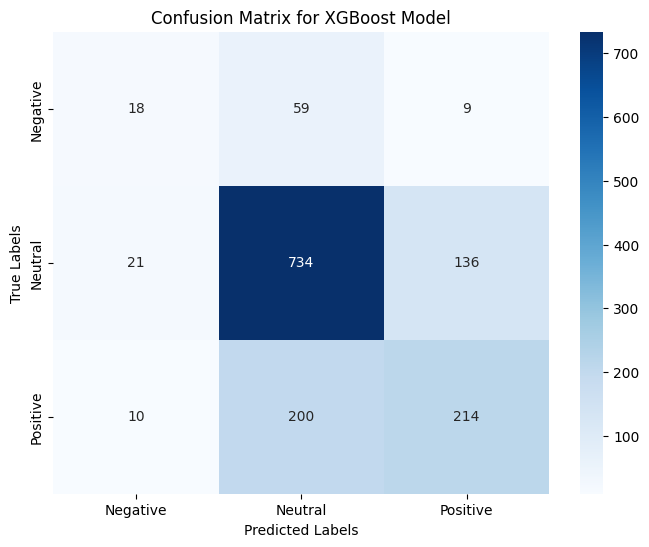

In [413]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for the test set
conf_matrix = confusion_matrix(y_test_multiclass, y_test_pred_multiclass_xgb)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


**Final note on modeling**

Despite implementing resampling techniques to address class imbalance, the model's accuracy has not improved significantly. This suggests that other factors within the dataset may be limiting predictive performance.

The binary logistic regression model performs best.

For Multiclass XGBoost was better

#### 7.Limitation and Challenges 
- Class Imbalance Issue: The dataset suffers from class imbalance, where one sentiment class is dominant while others are underrepresented. This can result in biased models that are more accurate for the majority class but perform poorly on the minority classes. Addressing this issue is important to ensure fair and balanced sentiment analysis.

- Limited Dataset Size: The dataset used for sentiment analysis is relatively small, which can limit the model's ability to capture the full complexity of sentiments expressed in text. A larger and more diverse dataset would provide a broader representation of sentiments and improve the model's performance and generalization.

- Language Ambiguity and Sarcasm Detection: Language can be inherently ambiguous, and detecting sarcasm in text adds an extra layer of complexity. Sarcasm detection is challenging due to the subtleties and nuances involved. Developing robust strategies to handle language ambiguity and detect sarcasm is crucial for accurate sentiment analysis

#### 8.Recommendations
We recommend that there be more customer engagement.

Probably check on this areas;

   * Churn ratio - rate at which customers discontinue their relationship with a product company within a given time period
   * Social media influencers through brand or product endorsement
   * Customer feedback - The brands can introduce a rating system to accurately capture the sentiments of their customers 

#### 9. Next steps
- In our future work, we plan to explore advanced techniques such as incorporating attention mechanisms, using ensemble methods to further enhance the model's performance by incorporating domain-specific and fine-tuning the model on industry-specific datasets could improve its accuracy and adaptability.

- By considering these evaluation metrics, addressing limitations, and planning for future improvements, we aim to develop a robust NLP sentiment analysis solution that effectively captures sentiment
